# Notebook 09: Interpretation of a trained ML model

### Goal: Show some examples of how to interrogate a trained ML model

#### Background

While alot of this tutorial has been working up to training and evaluating a ML model they can still seem a bit like a black box. In order to help unveil some things that the ML model has learned, we will do a few *explanation* methods on the ML here. Specifically, we will show an example of *permutation importance* and the *accumulated local effects*. Both of these methods were discussed in the paper and are already coded up for you in the ```scikit-explain``` python package maintained by Dr. Flora at CIWRO [link](https://github.com/monte-flora/scikit-explain). These methods will help us understand what the ML learning has learned and give us some clues to the decision process it uses.

In order to save some time in setting up python, I did not include this package in the original install. So to install if please activate your ```waf_tutorial_part1``` environment

```$ conda activate waf_tutorial_part1 ``` 

then pip install the ```scikit-explain```

```$ pip install scikit-explain``` 

If when importing the next cell you get an error with importing matplotlib (something about a multiindex), upgrade matplotlib 

```$ pip install -U matplotlib``` 

#### Load presaved model + Training Data 

In notebook 4 and 5, we showed you how to save/load the simple ML model. Feel free to change the path to that file if you wish to see your model results. If not, leave the file path as is to see the trained models in the paper (without SVM because there is no ```predict_proba``` method, which is needed).

Just like the paper, we will start with the classification models. We also need the training data to do the investigations, so lets load that in too

In [1]:
import matplotlib.pyplot as plt
#make default resolution of figures much higher (i.e., High definition)
%config InlineBackend.figure_format = 'retina'


###################################### Load trained models ######################################
import joblib
names = ['LogisticRegression.pkl','NaiveBayes.pkl','DecisionTree.pkl','RandomForest.pkl','GradientBoostedTrees.pkl',]
start_path = '../datasets/sklearnmodels/classification/allfeatures/'
model_list = []

for name in names:
    #notice the change from wb to rb 
    savefile = open(start_path + name,'rb')
    #notice the change from dump to load 
    model_list.append(joblib.load(savefile))
    
print(model_list)
################################################################################################

###################################### Load training data ######################################
#import some helper functions for our other directory.
import sys
sys.path.insert(1, '../scripts/')
from aux_functions import load_n_combine_df
import numpy as np
(X_train,y_train),(X_validate,y_validate),_ = load_n_combine_df(path_to_data='../datasets/sevir/',features_to_keep=np.arange(0,36,1),class_labels=True)

#remember since we have all 36 predictors we need to scale the inputs 
from sklearn.preprocessing import StandardScaler
#create scaling object 
scaler = StandardScaler()
#fit scaler to training data
scaler.fit(X_train)
#transform feature data into scaled space 
X_train = scaler.transform(X_train)
X_validate = scaler.transform(X_validate)
################################################################################################


[LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]


We do need to do a small adjustment to our training data. The ```skexplain``` expects a dataframe with the names of each column. So we have gone ahead and provided a list of names for each column in the next cell. The *q* stands for quantile and then the number is the percentile that it is (where 0 is the min and 100 is the max). Then the *_* shows which variable it is (ir=='infrared',wv=='water vapor',vi=='visible',vl=='VIL')

In [2]:
import pandas as pd
column_names = ['q000_ir',
 'q001_ir',
 'q010_ir',
 'q025_ir',
 'q050_ir',
 'q075_ir',
 'q090_ir',
 'q099_ir',
 'q100_ir',
 'q000_wv',
 'q001_wv',
 'q010_wv',
 'q025_wv',
 'q050_wv',
 'q075_wv',
 'q090_wv',
 'q099_wv',
 'q100_wv',
 'q000_vi',
 'q001_vi',
 'q010_vi',
 'q025_vi',
 'q050_vi',
 'q075_vi',
 'q090_vi',
 'q099_vi',
 'q100_vi',
 'q000_vl',
 'q001_vl',
 'q010_vl',
 'q025_vl',
 'q050_vl',
 'q075_vl',
 'q090_vl',
 'q099_vl',
 'q100_vl']

X_df = pd.DataFrame(X_validate,columns=column_names)
X_df.head()

,q000_ir,q001_ir,q010_ir,q025_ir,q050_ir,q075_ir,q090_ir,q099_ir,q100_ir,q000_wv,...,q100_vi,q000_vl,q001_vl,q010_vl,q025_vl,q050_vl,q075_vl,q090_vl,q099_vl,q100_vl
0,0.107446,-0.069976,-0.253568,-0.257330,-0.390479,-0.403563,-0.163391,-0.002153,0.112469,0.372505,...,0.600918,-0.075823,-0.077287,-0.081944,-0.091565,-0.106608,-0.121572,-0.166316,-0.414281,-0.866781
1,-0.013895,0.113248,0.656777,0.519347,0.193368,-0.184280,-0.422277,-0.084017,0.442294,0.114262,...,0.800338,-0.075823,-0.077287,-0.081944,-0.091565,-0.106608,-0.107207,-0.096333,-0.279112,-0.305322
2,0.108580,0.049271,0.079059,-0.060190,-0.416348,-0.743419,-0.916883,-0.810590,0.086714,0.337585,...,0.753428,-0.075823,-0.077287,-0.081944,-0.085482,-0.075701,-0.061349,-0.061130,-0.302338,-0.757140
3,0.445386,0.289766,0.382246,0.386894,0.174635,0.146080,0.292410,0.405605,0.284443,0.694903,...,0.604475,-0.075823,-0.077287,-0.081944,-0.091565,-0.106608,-0.141539,-0.198398,-0.507693,-0.765000
4,0.992554,1.492513,1.658309,1.619017,1.410568,1.114670,0.925436,0.785285,0.808673,0.822401,...,1.068231,-0.075823,-0.077287,-0.081944,-0.091565,-0.106608,-0.141539,-0.216426,-0.528468,-0.305322


okay, our data is ready then to use the ```skexplain``` package. Both methods discussed will use the method named ```ExplainToolkit()``` where the inputs are your trained models ```estimators``` and your data ```X```,```y```

In [3]:
import skexplain

estimators = estimators = [('LogisticRegression',model_list[0]),('NaiveBayes',model_list[1]),('DecisionTree',model_list[2]),('RandomForest',model_list[3]),('GradientBoostedTrees',model_list[4])]
explainer = skexplain.ExplainToolkit(estimators=estimators, X=X_df, y=y_validate,)
                                                               

Now that the main explainer object is defined, we will calculate the permutation importance. 

# Permutation Importance

### Single Pass permutation importance

Here is a good animation of what single pass permutation importance does. Click the image to take you to the page source.

<a href=https://permutationimportance.readthedocs.io/en/latest/methods.html#permutation-importance> <img alt="Animation of singlepass permutation importance" src="https://permutationimportance.readthedocs.io/en/latest/_images/SinglePassPermutation.gif"> </a>


Each predictor (i.e., feature) is shuffled to see how it impacts some sort of metric (i.e., loss/error). For our example we use the AUC of the ROC curve, like we discussed in the paper. The intuition is that the most important predictor will be the one that *hurts* the model performance the most when it is shuffled (i.e., random). 

### Multipass permutation importance

Unfortunately, there are alot of correlations between input predictors in most datasets. So single pass permutation importance might not show use the true value of some inputs because the prediction power might be split across the highly correlated features. One way around that is to do a multi-pass permutation importance. 

<a href=https://permutationimportance.readthedocs.io/en/latest/methods.html#permutation-importance> <img alt="Animation of multipass permutation importance" src="https://permutationimportance.readthedocs.io/en/latest/_images/MultiPassPermutation.gif"> </a>


So as you can see in the gif, we first permutate all of them (like single pass), find the max change to the loss, then we freeze the shuffled variable that caused the largest change. From there, we shuffle the variables that are left. we repeat this until you get the desired number of variables (above we chose 5). This is called the *backward permutation importance*. You can do this same methodology but in the forward direction. In other words, you can start with them all shuffled, and un-permute them, to see how much *better* the AUC score becomes. 

Note that it does take a decent amount of time to do this test. So if you can do this in parallel (i.e., how many cores does your machine have?) change ```n_jobs``` to something > 1. But if you do n_jobs=1, maybe go make a cup of tea and grab a snack. The code block will save it to a netcdf file so you don’t have to recalculate this again late. 

In fact, we have already saved the result of this cell block, so you dont even have to run it to jump to plotting it! (skip this cell and just go to the next one where we load the saved data)

In [4]:
#run permutation importance! we will assume AUC of the ROC curve as our metric. 
results_backward = explainer.permutation_importance(n_vars=5,evaluation_fn='auc', n_permute=10, subsample=0.25,n_jobs=4,verbose=True,random_seed=42, 
                                           direction='backward',)

#Save the permutation importance results as a netcdf file using the bulit-in function 
explainer.save(fname='../datasets/explanations/multipass_importance_auc_backward.nc', data=results_backward)

results_forward = explainer.permutation_importance(n_vars=5,evaluation_fn='auc', n_permute=10, subsample=0.25,n_jobs=4,verbose=True,random_seed=42, 
                                           direction='forward',)

#Save the permutation importance results as a netcdf file using the bulit-in function 
explainer.save(fname='../datasets/explanations/multipass_importance_auc_forward.nc', data=results_forward)

Multi-pass iteration 1 out of 5...
Multi-pass iteration 2 out of 5...
Multi-pass iteration 3 out of 5...
Multi-pass iteration 4 out of 5...
Multi-pass iteration 5 out of 5...
Multi-pass iteration 1 out of 5...
Multi-pass iteration 2 out of 5...
Multi-pass iteration 3 out of 5...
Multi-pass iteration 4 out of 5...
Multi-pass iteration 5 out of 5...
Multi-pass iteration 1 out of 5...
Multi-pass iteration 2 out of 5...
Multi-pass iteration 3 out of 5...
Multi-pass iteration 4 out of 5...
Multi-pass iteration 5 out of 5...
Multi-pass iteration 1 out of 5...
Multi-pass iteration 2 out of 5...
Multi-pass iteration 3 out of 5...
Multi-pass iteration 4 out of 5...
Multi-pass iteration 5 out of 5...
Multi-pass iteration 1 out of 5...
Multi-pass iteration 2 out of 5...
Multi-pass iteration 3 out of 5...
Multi-pass iteration 4 out of 5...
Multi-pass iteration 5 out of 5...
Multi-pass iteration 1 out of 5...
Multi-pass iteration 2 out of 5...
Multi-pass iteration 3 out of 5...
Multi-pass iteration

if you need to load the saved file you can use this cell block: 

In [7]:
#create explainer object
explainer = skexplain.ExplainToolkit()
# Load the results file into the explainer object
results_forward = explainer.load(fnames='../datasets/explanations/multipass_importance_auc_backward.nc')
results_backward = explainer.load(fnames='../datasets/explanations/multipass_importance_auc_forward.nc')

Good, now we can plot it up. To do this, we will use the stock ```plot_importance``` method built within ```skexplain```. To start off simple, let us look at the single pass permutation test for random forest.

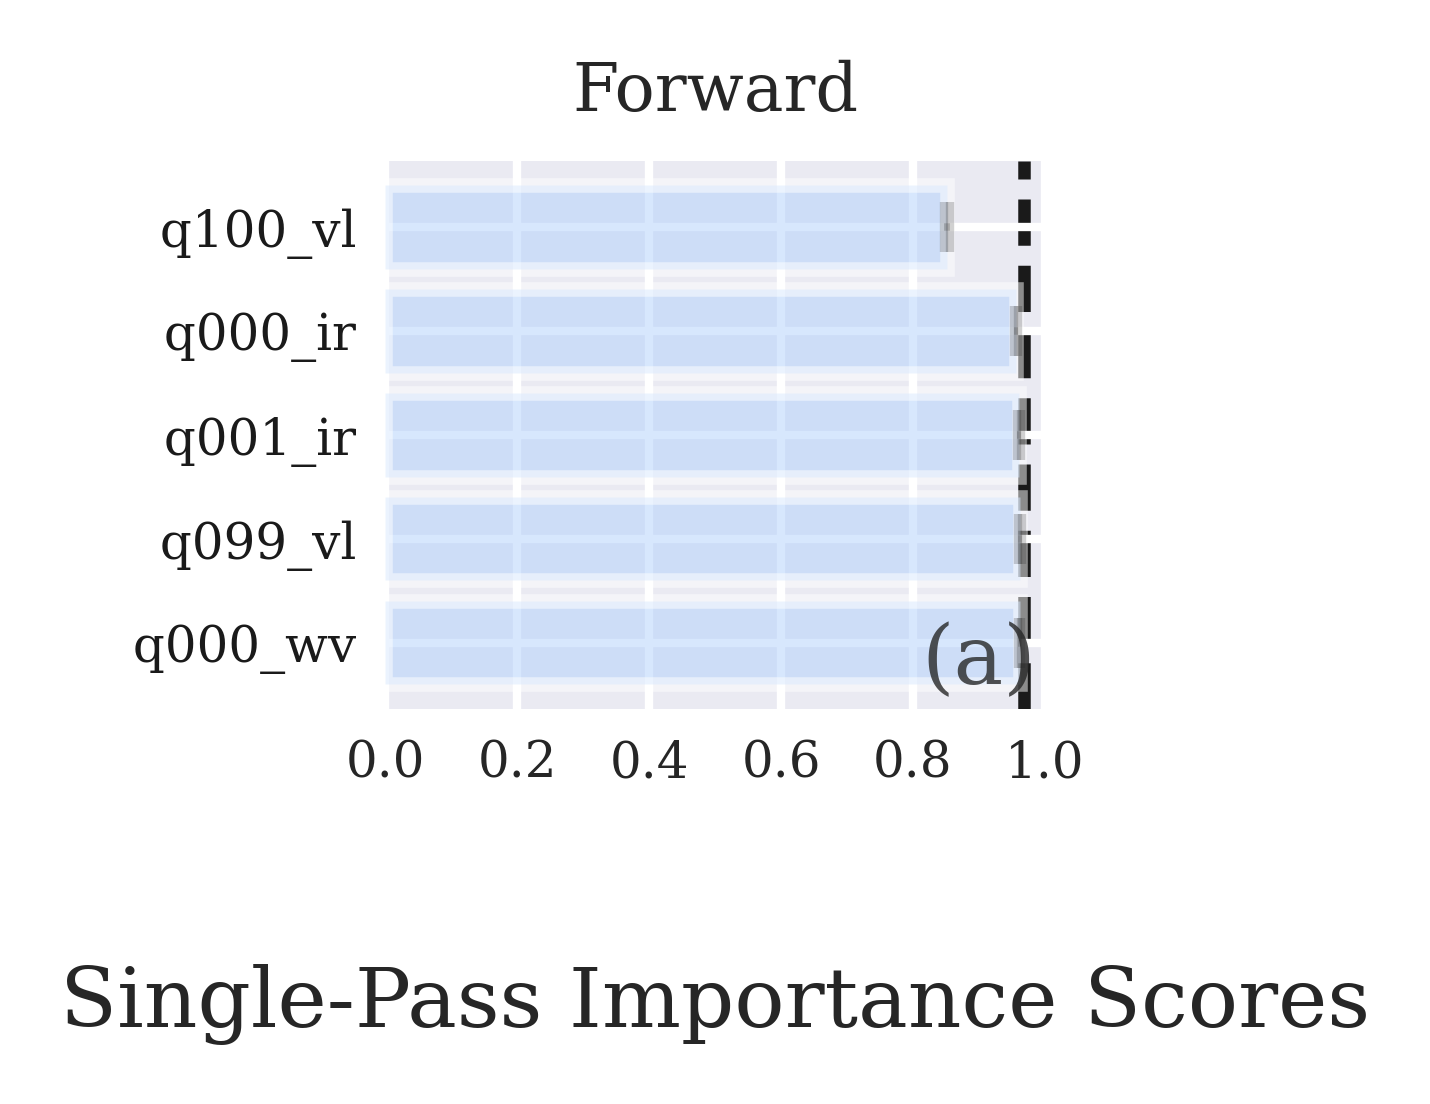

In [8]:
#use the plot_importance method. it takes the result of the permuation test, whatever panels you want to make, then the number of bars you want. 
fig,ax = explainer.plot_importance(data=results_forward, 
                                panels=[('singlepass', 'RandomForest')], 
                                num_vars_to_plot=5,figsize=(2,2))

#add the original AUC score to see how much it changes when we shuffle a feature
ax.set_title('Forward')
ax.axvline(results_forward.original_score__RandomForest.mean(),color='k',ls='--',zorder=0);
ax.set_xlim([0,1])
plt.tight_layout()

The xaxis is the AUC value, while the dashed black line shows the validation score with the validation as is (no shuffline). The bars then show the AUC when we shuffle that feature (labeled on the y-axis). We have ordered these based on the largest rediction of AUC is at the top. 

We can see here that the 100th percentile of vertically integrated liquid (VIL; ```q100_vl```) is the most important predictor, reducing AUC by about 0.1. The fact that VIL is the top predictors makes sense meteorologically since the radar is deriving the amount of liquid water inside the profile, which has been already linked to lightning formation ([Watson et al. 1995](https://journals.ametsoc.org/view/journals/wefo/10/3/1520-0434_1995_010_0592_lftndn_2_0_co_2.xml)). The second most important feature is the 99th percentile of VIL, which along the same lines are the most important predictor make sense. The third most important is the minimum clean infrared brightness temperature (```q000_ir```), which also makes sense meteorologically given that deeper (i.e., stronger) convection has colder infrared brightness temperatures. That being said, the difference in AUC using the minimum infrared and minimum water vapor and so are not that large.  

Above was the result of starting with the data unpermuated, then going ahead and permuting each feature one at a time (the foreward method). Now if we do the opposite, and start with all variables shuffled, and unshuffle one feature at a time does it show us the same importance order?

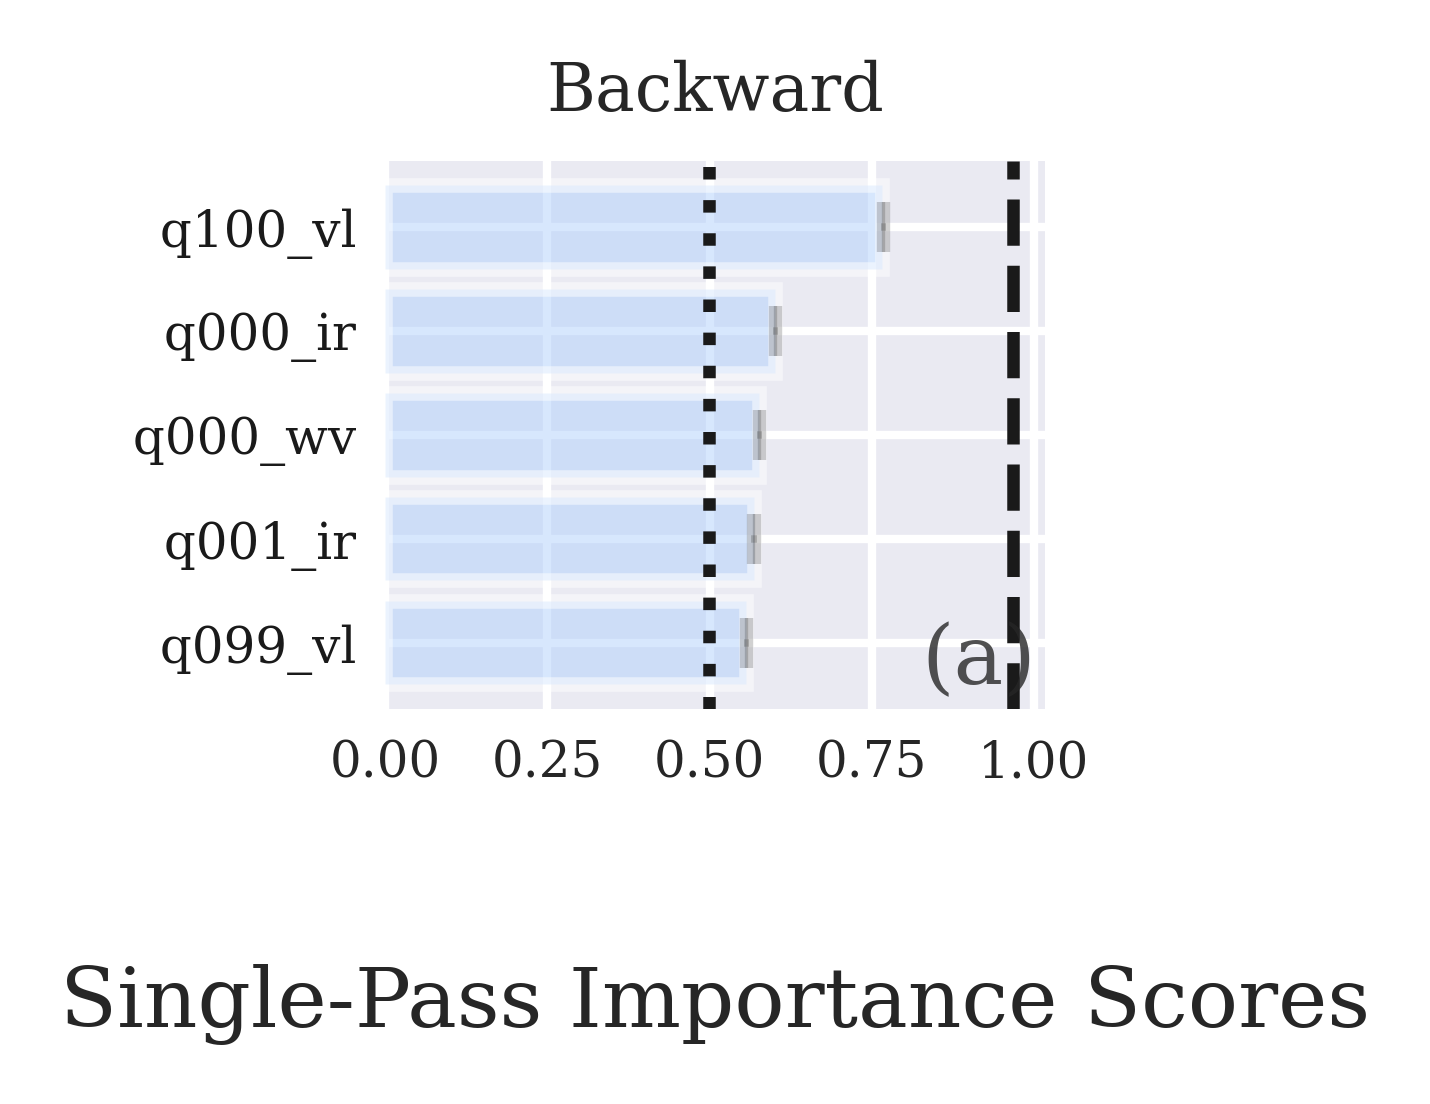

In [9]:
#use the plot_importance method. it takes the result of the permuation test, whatever panels you want to make, then the number of bars you want. 
fig,ax = explainer.plot_importance(data=results_backward, 
                                panels=[('singlepass', 'RandomForest')], 
                                num_vars_to_plot=5,figsize=(2,2))

#add the original AUC score to see how much it changes when we shuffle a feature
ax.set_title('Backward')
ax.axvline(results_backward.all_permuted_score__RandomForest.mean(),color='k',ls=':');
ax.axvline(results_forward.original_score__RandomForest.mean(),color='k',ls='--');
plt.tight_layout()

Same as the last one, the xaxis is the AUC value. But this time the dotted black line shows the validation score with the validation data all shuffled. The dashed black line is the validation data without the shuffling. The bars then show the AUC when we **un**shuffle that feature (labeled on the y-axis). We have ordered these based on the largest rediction of AUC is at the top. 

The results are effectively the same with a swap between the minimum water vapor brightness temperature and the infrared. 

As we stated before, the correlation between predictors could be skewing the results of doing the single-pass importance. Let's take a look at the multi-pass. As a reminder, the multi-pass does the single pass first, finds the largest change to AUC, then leaves that predictor shuffled. Then it does the single pass again on the new set of features, finds the max change in AUC again and leaves that one shuffled and so on. 

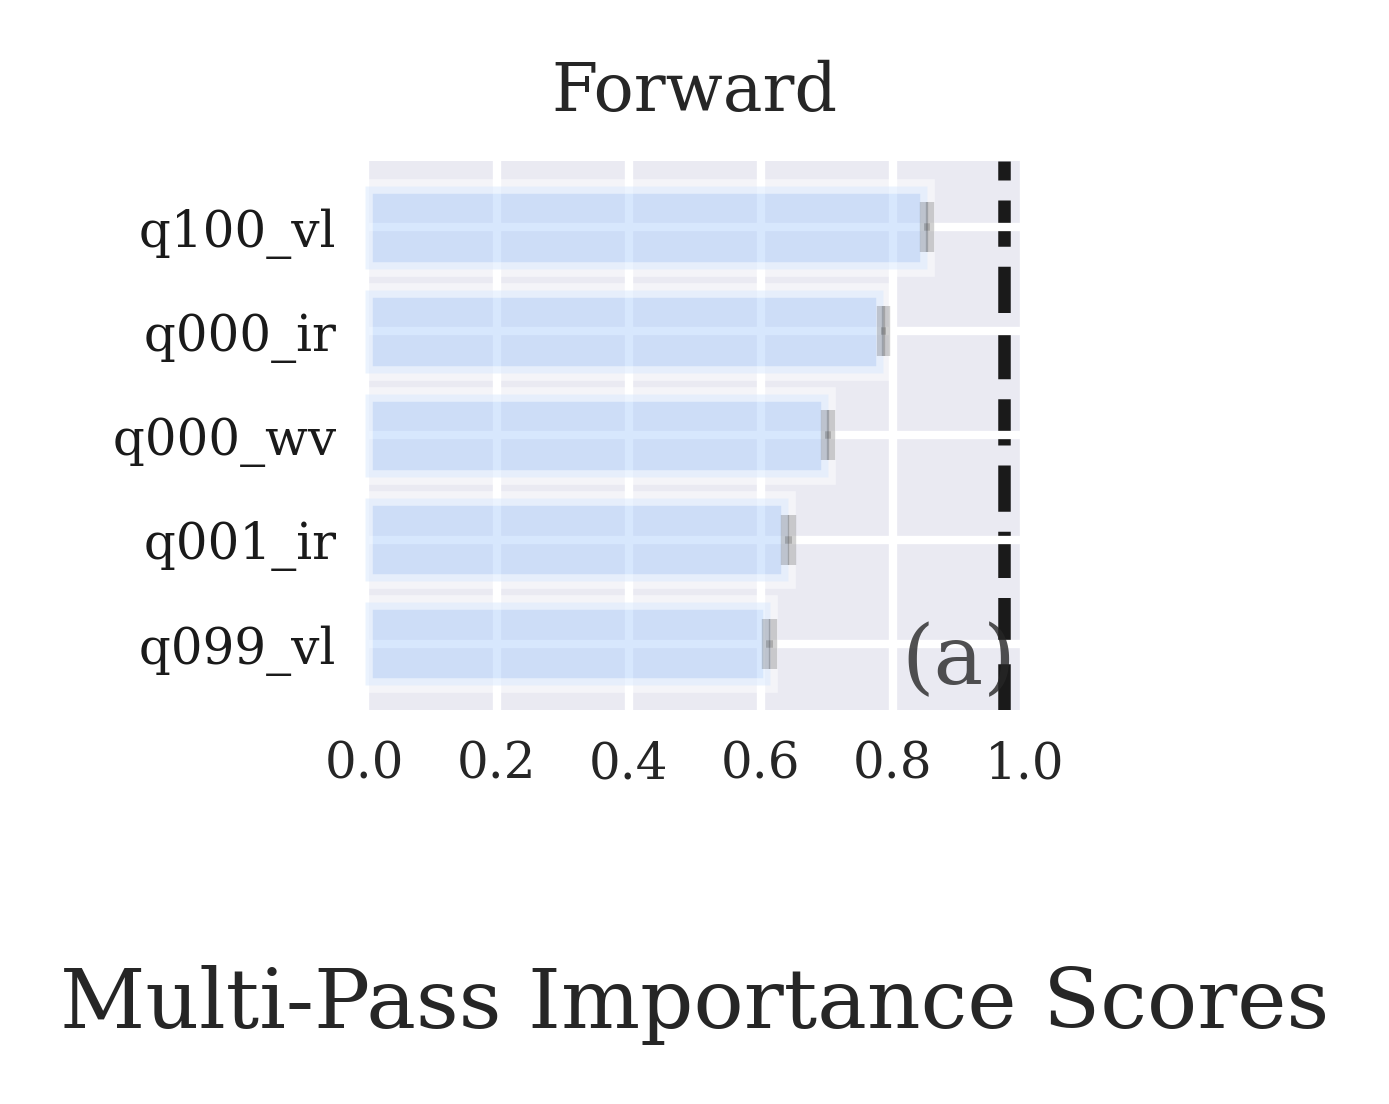

In [10]:
#use the plot_importance method. it takes the result of the permuation test, whatever panels you want to make, then the number of bars you want. 
fig,ax = explainer.plot_importance(data=results_forward, 
                                panels=[('multipass', 'RandomForest')], 
                                num_vars_to_plot=5,figsize=(2,2))

#add the original AUC score to see how much it changes when we shuffle a feature
ax.set_title('Forward')
ax.axvline(results_forward.original_score__RandomForest.mean(),color='k',ls='--',zorder=0);
ax.set_xlim([0,1])
plt.tight_layout()

Same as the single-pass forward results. It would seem the same features are indicated as important. Let's try the backward method

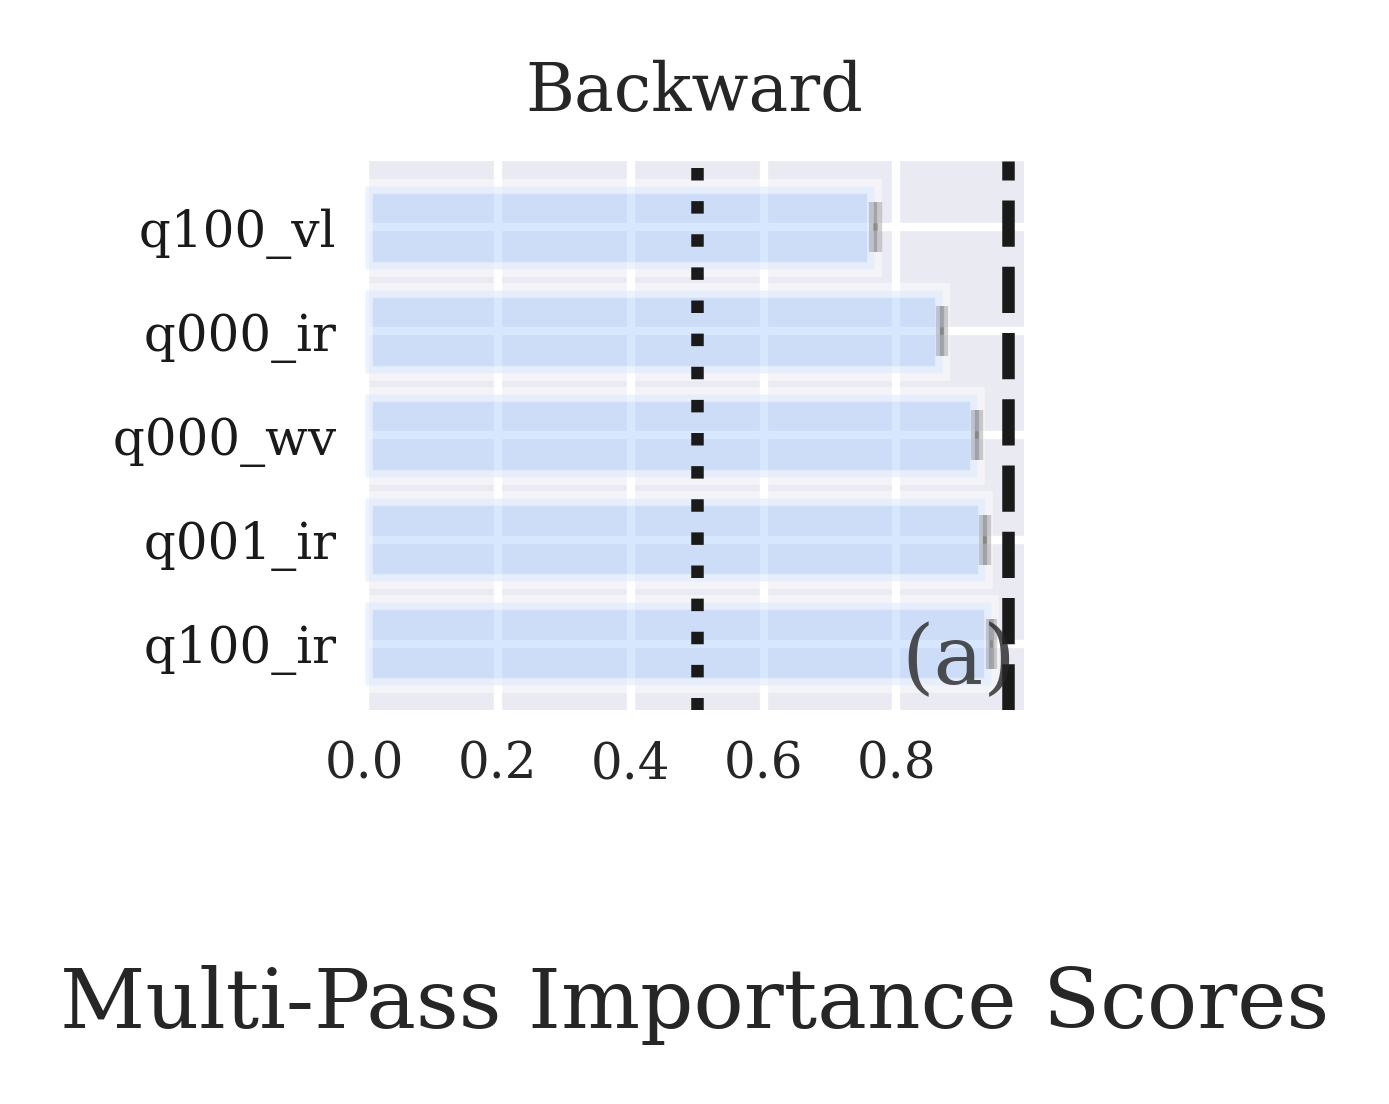

In [11]:
#use the plot_importance method. it takes the result of the permuation test, whatever panels you want to make, then the number of bars you want. 
fig,ax = explainer.plot_importance(data=results_backward, 
                                panels=[('multipass', 'RandomForest')], 
                                num_vars_to_plot=5,figsize=(2,2))

#add the original AUC score to see how much it changes when we shuffle a feature
ax.set_title('Backward')
ax.axvline(results_backward.all_permuted_score__RandomForest.mean(),color='k',ls=':');
ax.axvline(results_forward.original_score__RandomForest.mean(),color='k',ls='--');
plt.tight_layout()

These are mostly the same, until the 5th one. Interestingly, the ```q100_ir``` (the **max** infrared brightness temperature) is the 5th most important. This could make sense since the maximum brightness temperature is likely some sort of proxy for the surface temperature. 

How do we reconcile all these results? In general you want to take the consensus, which points to the max VIL being the most important predictor when training a random forest with all features. 

One cool thing about ```skexplain```, is that we can easily show more than 1 model and more than one test. So lets take a look at the top 5 features for logistic regression, random forest and gradient boosted trees. Specifically, lets look at the forward test.

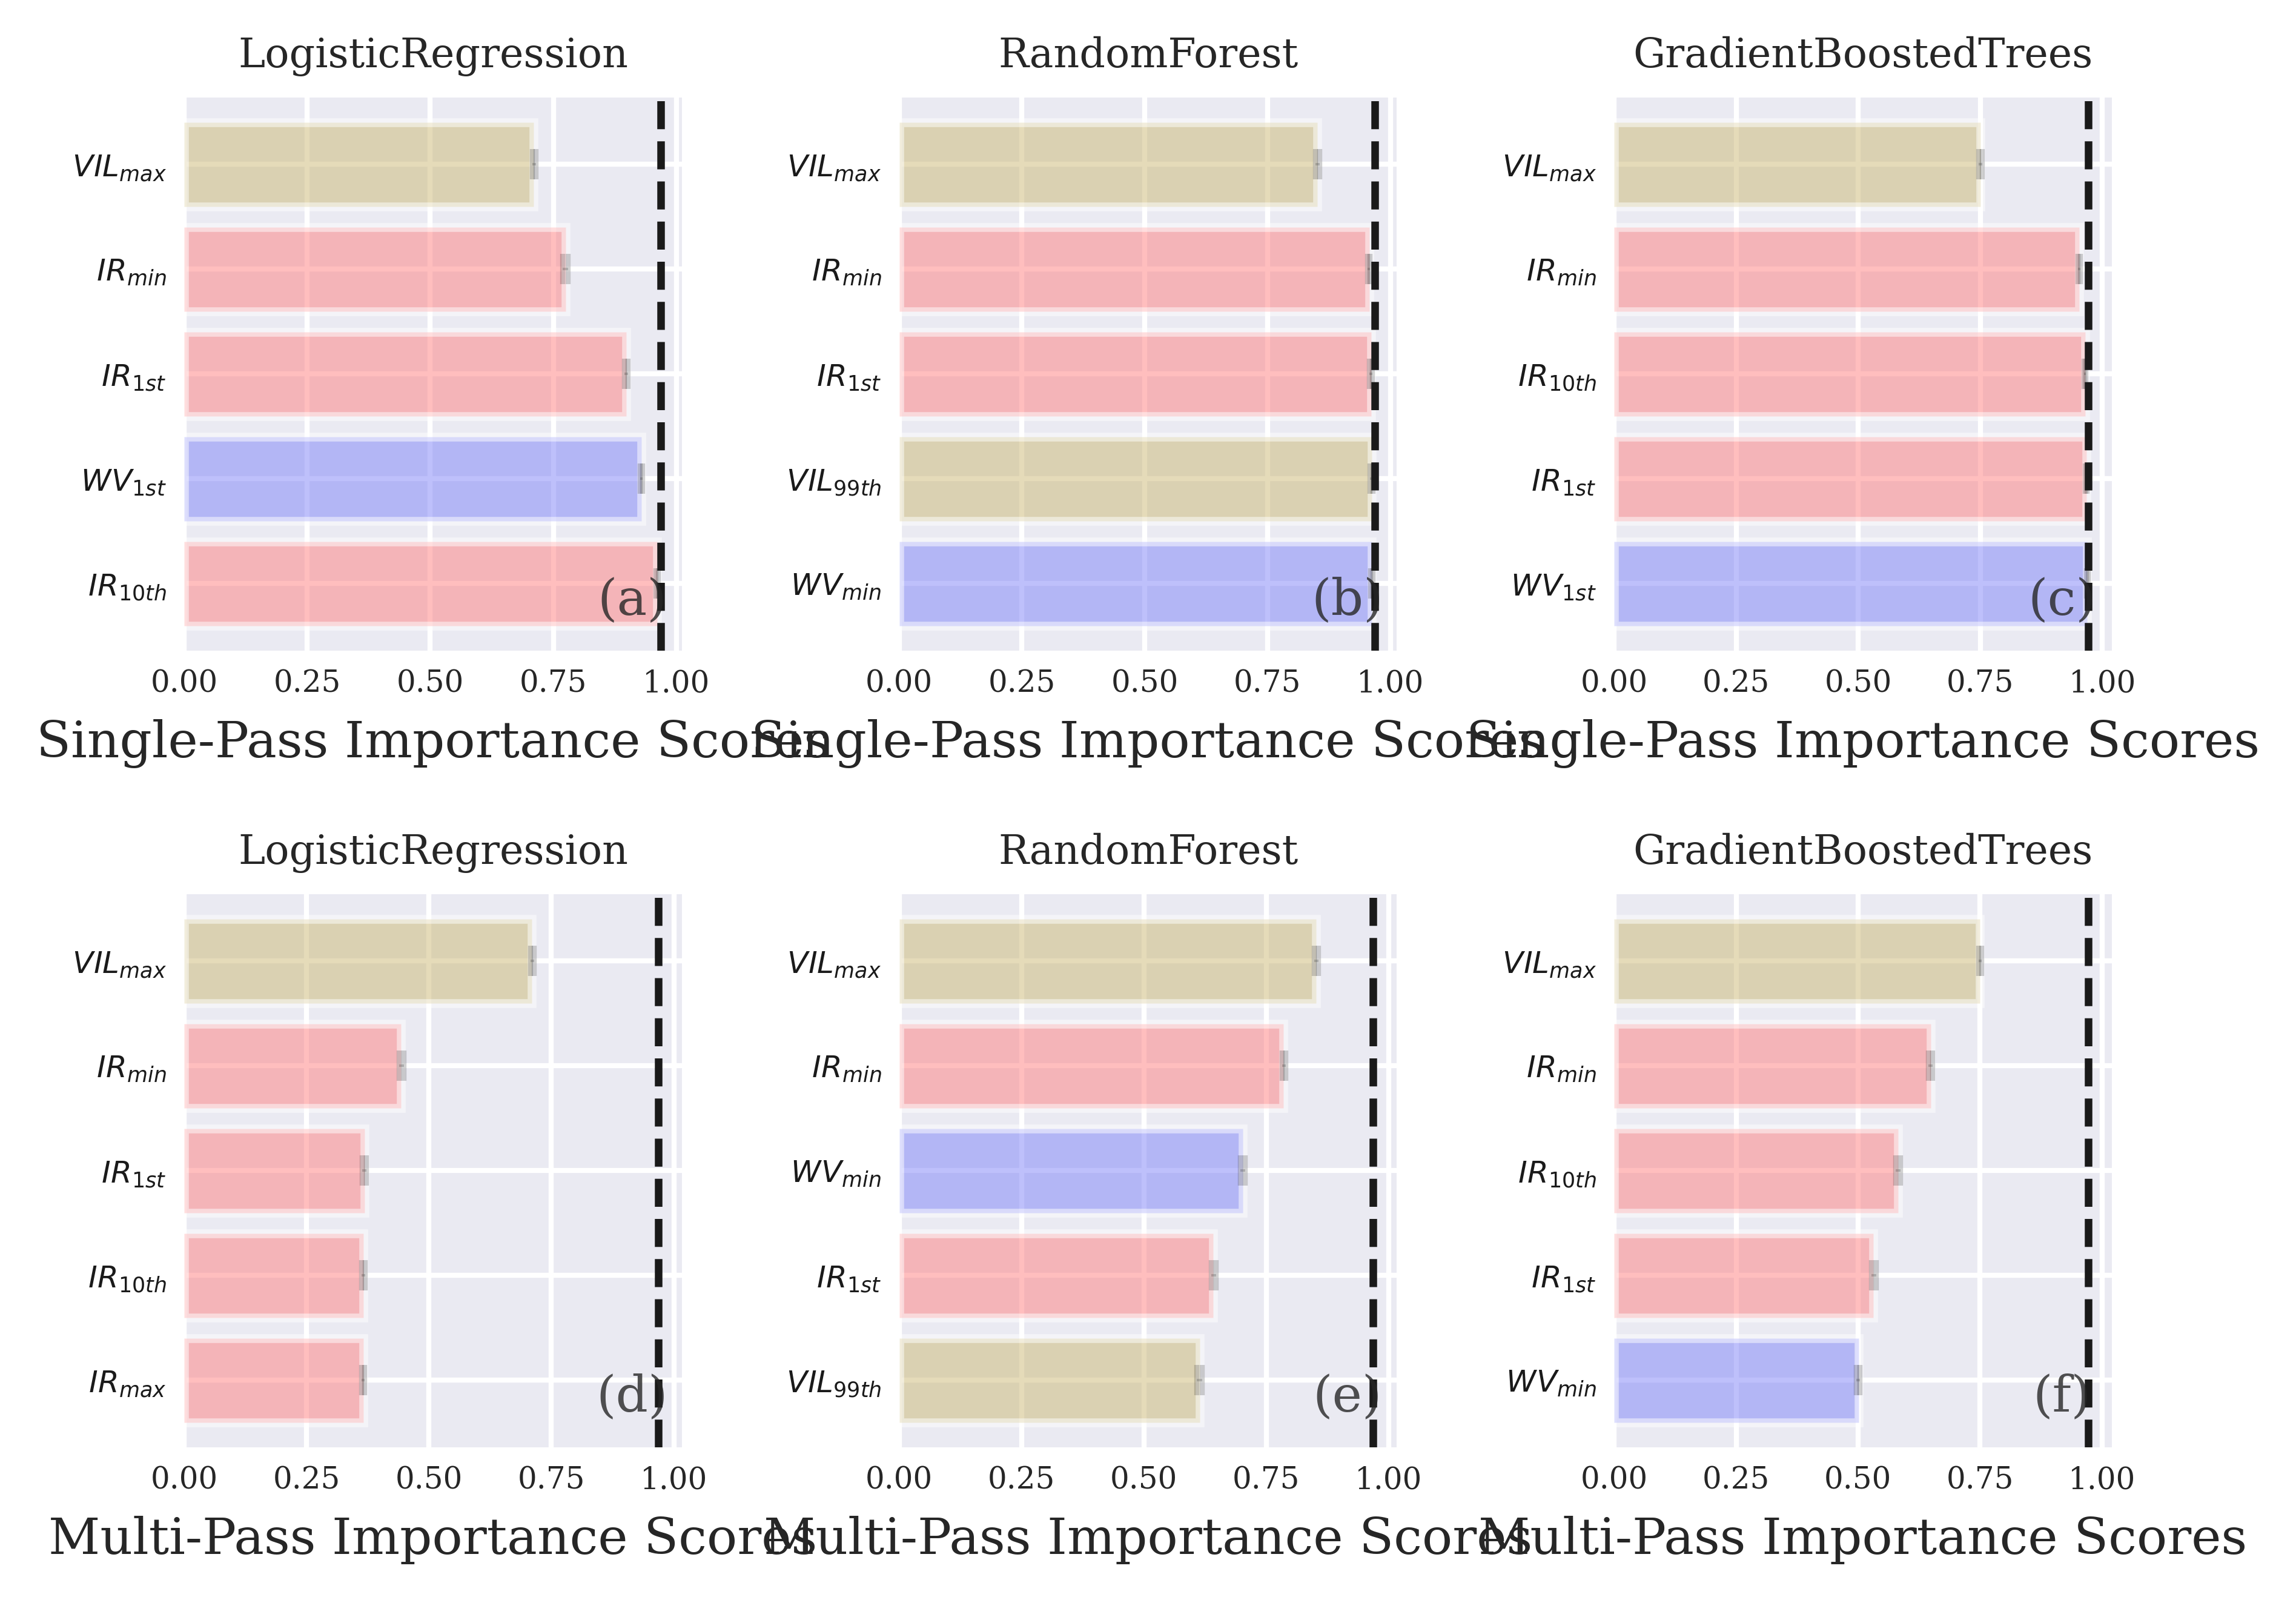

In [13]:
from aux_functions import display_feature_names,color_dict

panels=[('singlepass', 'LogisticRegression'), 
        ('singlepass', 'RandomForest'), 
        ('singlepass', 'GradientBoostedTrees'),
        ('multipass', 'LogisticRegression'),
        ('multipass', 'RandomForest'),
        ('multipass', 'GradientBoostedTrees')]
                 
fig,axes = explainer.plot_importance(data=[results_forward]*6, 
                                panels=panels,
                                num_vars_to_plot=5, 
                               display_feature_names=display_feature_names,
                               feature_colors=color_dict)

axes = axes.ravel()
for i,ax in enumerate(axes):
    method = panels[i][1]
    ax.axvline(results_forward['original_score__' +method].mean(),color='k',ls='--')
    
fig.set_facecolor('w')

Okay, now lets do the same with the backward results

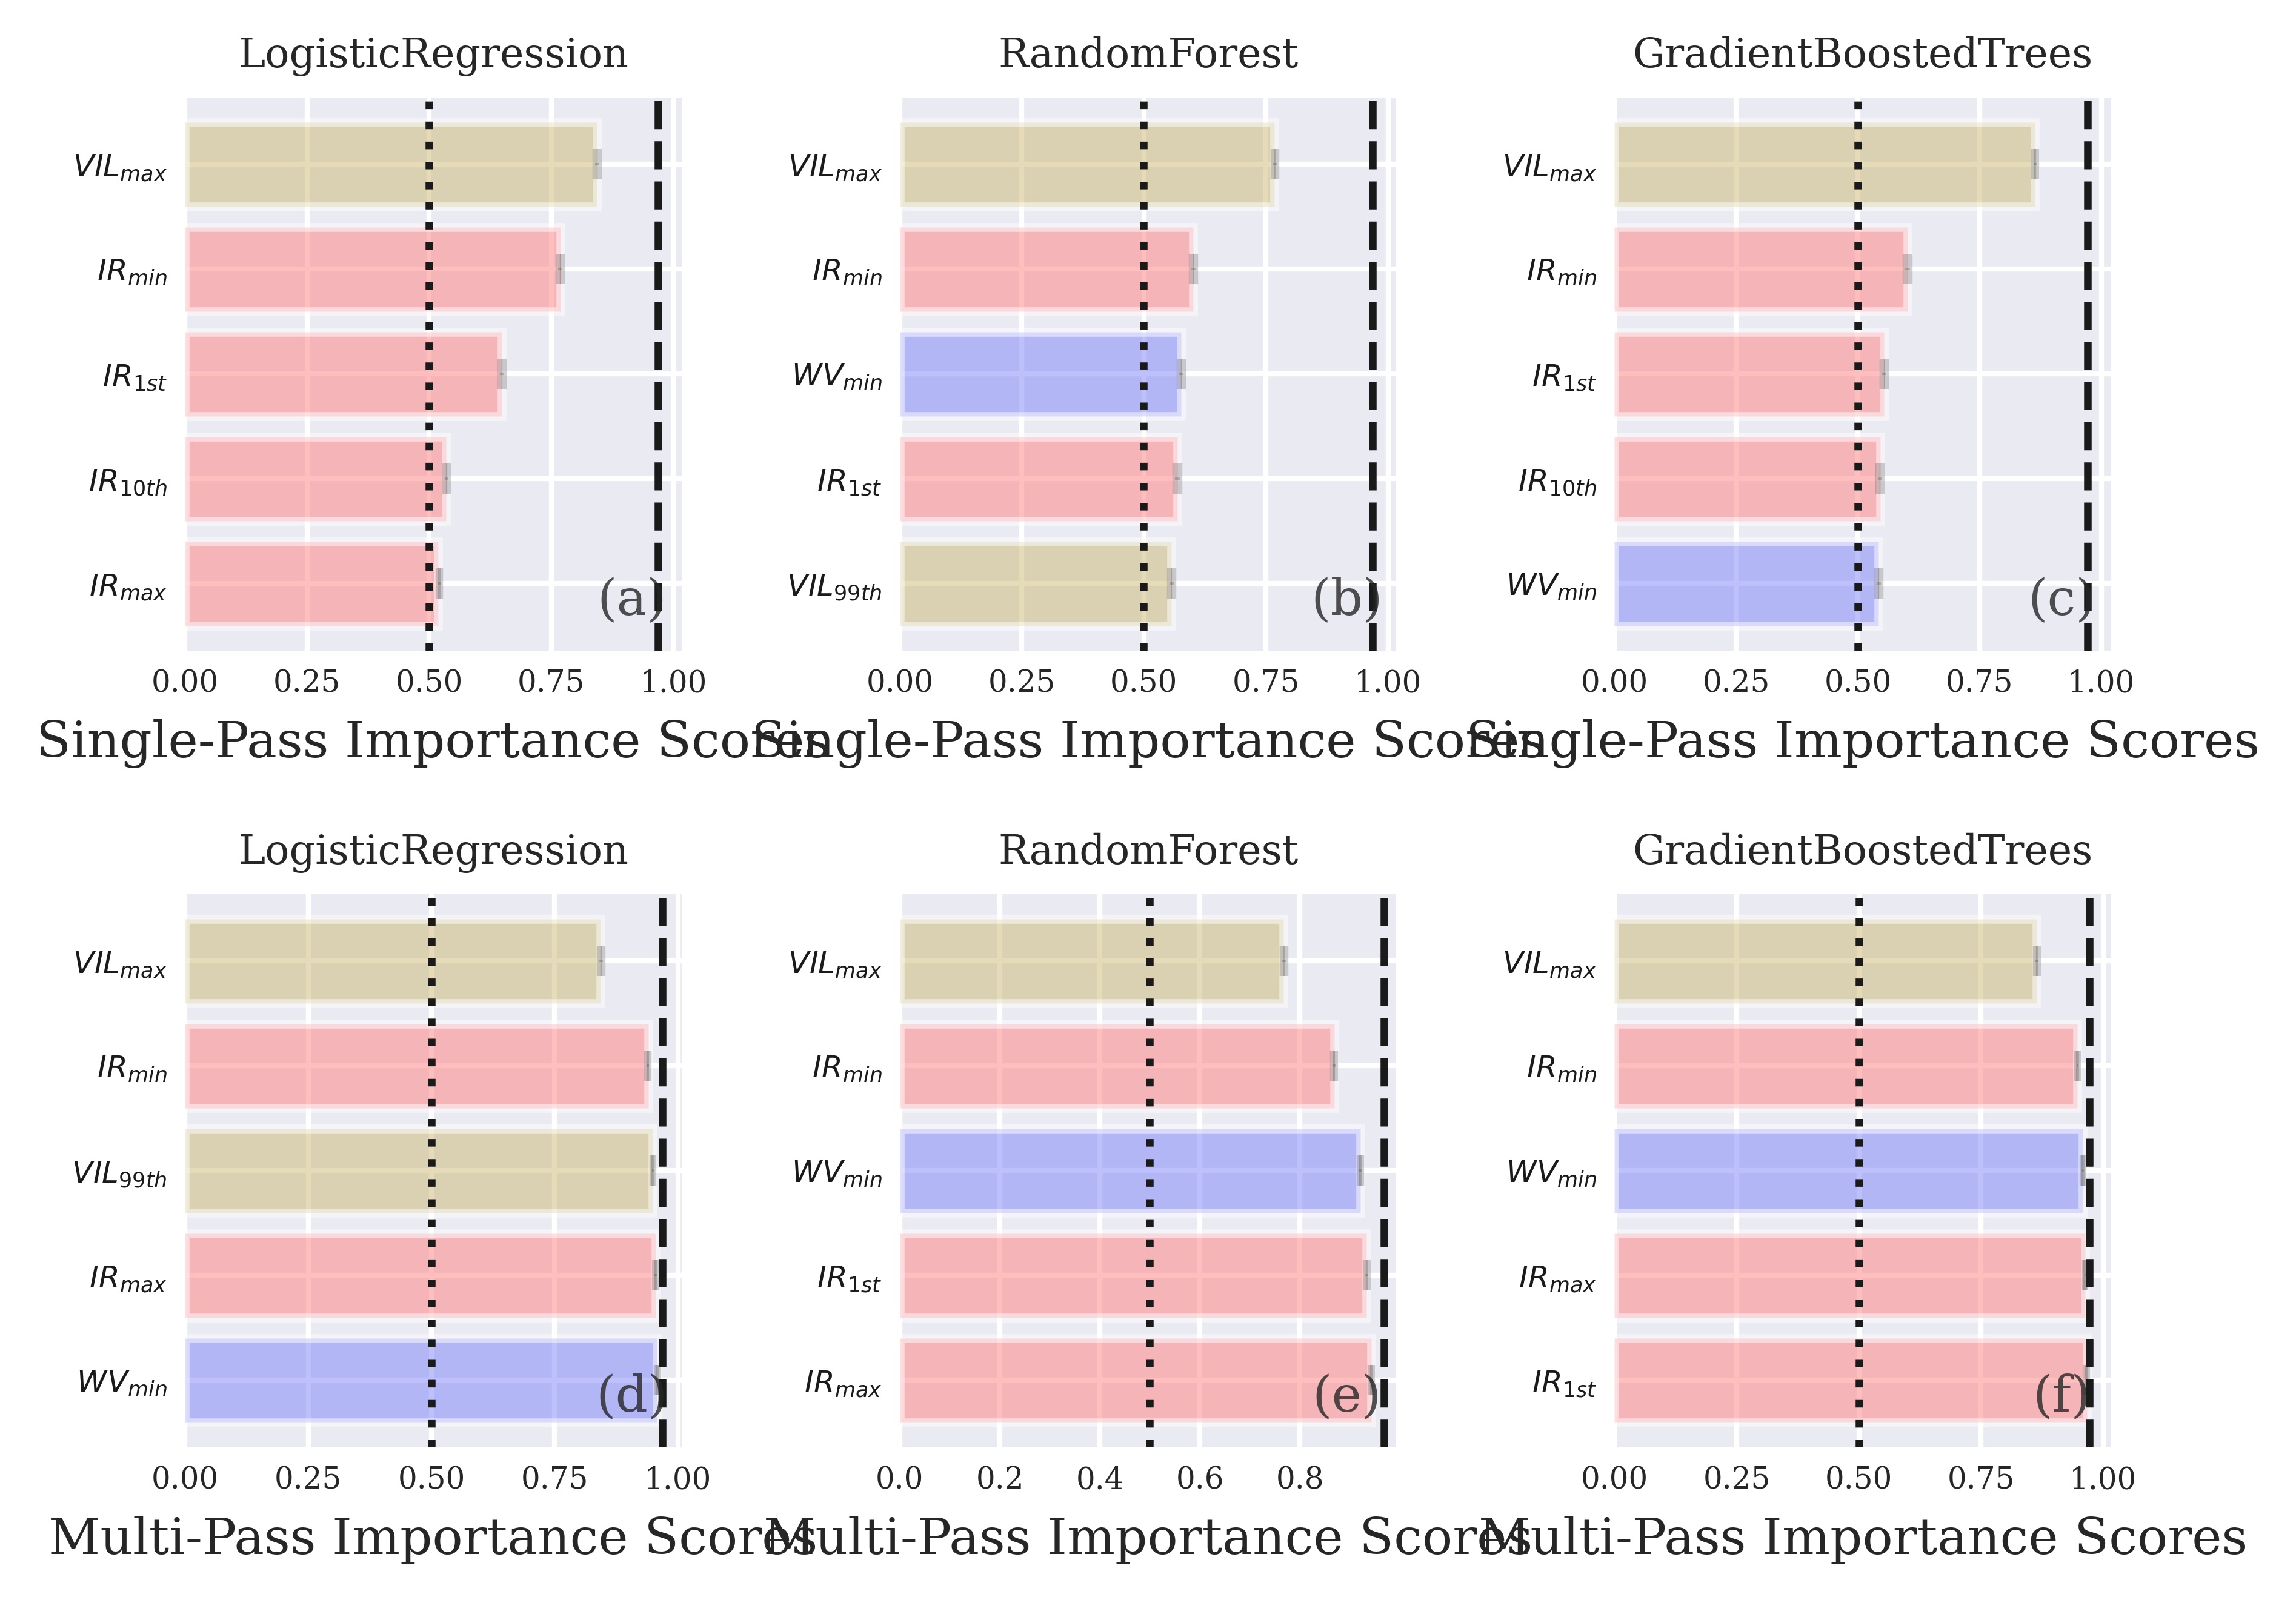

In [14]:
panels=[('singlepass', 'LogisticRegression'), 
                                        ('singlepass', 'RandomForest'), 
                                        ('singlepass', 'GradientBoostedTrees'),
                                        ('multipass', 'LogisticRegression'),
                                        ('multipass', 'RandomForest'),
                                        ('multipass', 'GradientBoostedTrees')]
                 
fig,axes = explainer.plot_importance(data=[results_backward]*6, 
                                panels=panels,
                                num_vars_to_plot=5, 
                               display_feature_names=display_feature_names,
                               feature_colors=color_dict)

axes = axes.ravel()
for i,ax in enumerate(axes):
    method = panels[i][1]
    ax.axvline(results_backward['original_score__' +method].mean(),color='k',ls='--')
    ax.axvline(results_backward['all_permuted_score__' +method].mean(),color='k',ls=':')
    
fig.set_facecolor('w')

# Accumulated Local Effects (ALE) 

In [19]:
import skexplain

estimators = estimators = [('RandomForest',model_list[3])]
explainer = skexplain.ExplainToolkit(estimators=estimators, X=X_df, y=y_validate,)

ale_1d_ds = explainer.ale(features=['q100_vl','q000_ir','q000_wv'],n_bootstrap=1,subsample=1000,n_jobs=1, n_bins=20)


  0%|          | 0/3 [00:00<?, ?it/s]

Text(0.5, 0, '$WV_{min}$, [$^{\\circ}$C]')

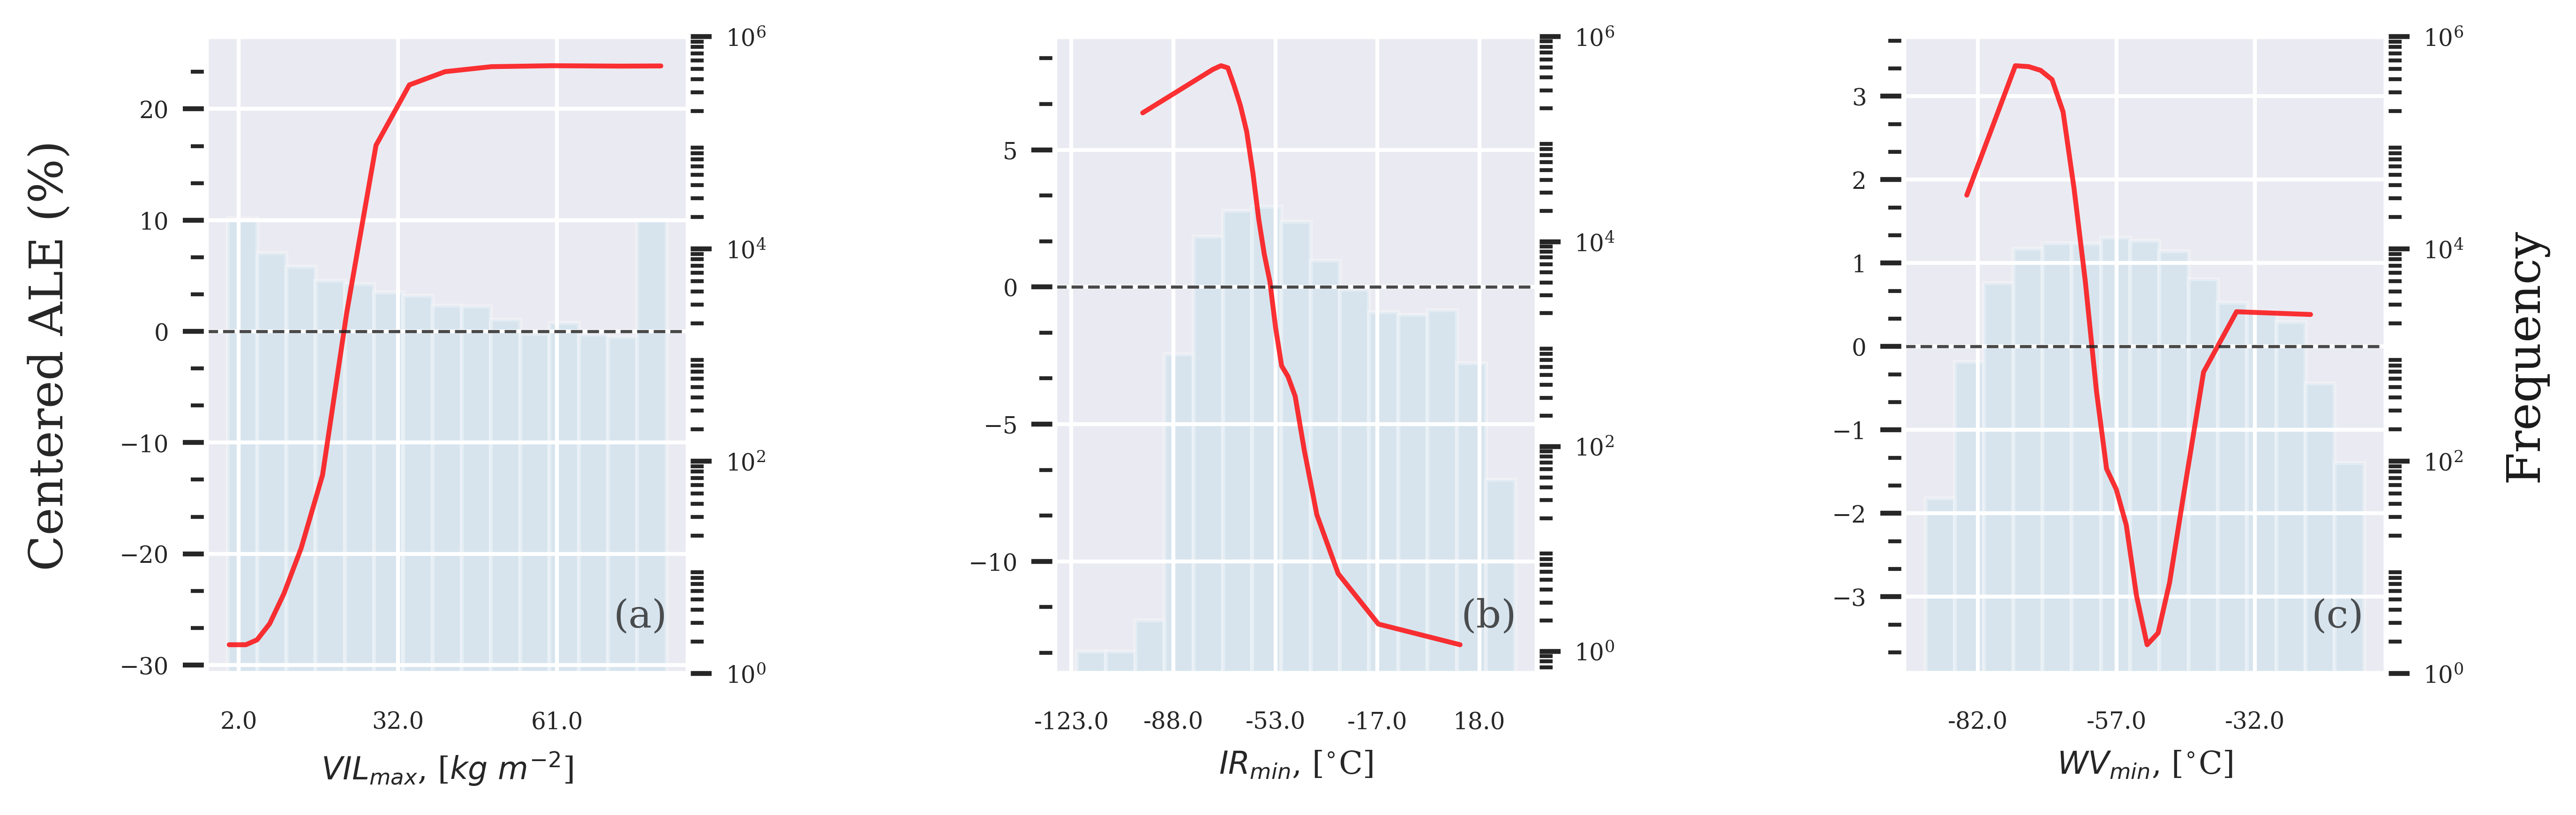

In [20]:
fig, axes = explainer.plot_ale(ale = ale_1d_ds,figsize=(10,3),
                              line_colors = ['b','r','g','y','LightGreen','k'])
fig.set_facecolor('w')

ax = axes[0]
xticks = ax.get_xticks()
#scale back 
xlabels = np.round(xticks*scaler.scale_[-1] + scaler.mean_[35])
ax.set_xticklabels(xlabels)
ax.set_xlabel('$VIL_{max}$, [$kg \ m^{-2}$]')

ax = axes[1]
xticks = ax.get_xticks()
#scale back 
xlabels = np.round(xticks*scaler.scale_[0] + scaler.mean_[0])
ax.set_xticklabels(xlabels)
ax.set_xlabel('$IR_{min}$, [$^{\circ}$C]')


ax = axes[2]
xticks = ax.get_xticks()
#scale back 
xlabels = np.round(xticks*scaler.scale_[9] + scaler.mean_[9])
ax.set_xticklabels(xlabels)
ax.set_xlabel('$WV_{min}$, [$^{\circ}$C]')